In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
bow=pd.read_csv('bowling.csv')
bow.head()

,PlayerName,Team1,Team2,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
0,Umesh Yadav,KKR,CSK,4.0,0,20,2,5.00,58
1,Shivam Mavi,KKR,CSK,4.0,0,35,0,8.75,4
2,Varun Chakaravarthy,KKR,CSK,4.0,0,23,1,5.75,33
3,Sunil Narine,KKR,CSK,4.0,0,15,0,3.75,10
4,Andre Russell,KKR,CSK,4.0,0,38,1,9.50,29


In [4]:
bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerName     856 non-null    object 
 1   Team1          856 non-null    object 
 2   Team2          856 non-null    object 
 3   Overs          856 non-null    float64
 4   Maidens        856 non-null    int64  
 5   Runs           856 non-null    int64  
 6   Wickets        856 non-null    int64  
 7   Economy        856 non-null    float64
 8   Dream11_score  856 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 60.3+ KB


In [5]:
bow.isnull().sum()

PlayerName       0
Team1            0
Team2            0
Overs            0
Maidens          0
Runs             0
Wickets          0
Economy          0
Dream11_score    0
dtype: int64

In [6]:
bow.describe()

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000
mean,3.326168,0.032710,28.019860,0.990654,8.729439,29.799065
std,0.996716,0.184436,11.227924,1.074927,3.336894,29.639421
min,0.100000,0.000000,1.000000,0.000000,1.670000,-2.000000
25%,3.000000,0.000000,20.000000,0.000000,6.500000,4.000000
50%,4.000000,0.000000,28.000000,1.000000,8.330000,29.000000
75%,4.000000,0.000000,36.000000,2.000000,10.500000,50.000000
max,4.000000,2.000000,64.000000,5.000000,36.000000,163.000000


<AxesSubplot:xlabel='PlayerName', ylabel='count'>

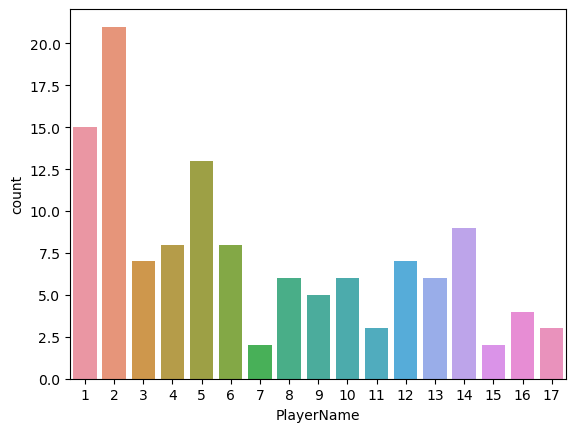

In [7]:
sns.countplot(x=bow.PlayerName.value_counts(),data=bow)

In [8]:
player_stats=bow[['PlayerName','Overs','Maidens','Runs','Wickets','Economy','Dream11_score']].groupby('PlayerName').sum().sort_values("Wickets",ascending=False)

In [9]:
highest_wkts=bow['Wickets'].argmax()
bow.iloc[highest_wkts]

PlayerName       Yuzvendra Chahal
Team1                          RR
Team2                         KKR
Overs                         4.0
Maidens                         0
Runs                           40
Wickets                         5
Economy                      10.0
Dream11_score                 143
Name: 350, dtype: object

In [10]:
highest_score=bow['Dream11_score'].argmax()
bow.iloc[highest_score]

PlayerName       Wanindu Hasaranga
Team1                          RCB
Team2                          SRH
Overs                          4.0
Maidens                          1
Runs                            18
Wickets                          5
Economy                        4.5
Dream11_score                  163
Name: 627, dtype: object

In [11]:
player_stats

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
PlayerName,,,,,,
Yuzvendra Chahal,68.0,0,527,27,131.75,785
Wanindu Hasaranga,57.0,1,430,26,123.25,760
Kagiso Rabada,48.0,0,406,23,110.67,645
Umran Malik,49.1,1,444,22,129.92,634
Kuldeep Yadav,49.4,0,419,21,118.79,605
...,...,...,...,...,...,...
Rasikh Salam,4.0,0,28,0,16.00,10
Rahul Tewatia,6.0,0,76,0,65.00,18
Mahipal Lomror,2.0,0,18,0,18.00,8


In [12]:
player_team=bow[['PlayerName','Team1']].groupby('PlayerName').sample()
player_team.set_index("PlayerName",inplace=True)
player_team
player_team.loc['Yuzvendra Chahal']

Team1    RR
Name: Yuzvendra Chahal, dtype: object

In [13]:
player_stats=player_stats.merge(player_team,on='PlayerName')
player_stats

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score,Team1
PlayerName,,,,,,,
Yuzvendra Chahal,68.0,0,527,27,131.75,785,RR
Wanindu Hasaranga,57.0,1,430,26,123.25,760,RCB
Kagiso Rabada,48.0,0,406,23,110.67,645,PBSK
Umran Malik,49.1,1,444,22,129.92,634,SRH
Kuldeep Yadav,49.4,0,419,21,118.79,605,DC
...,...,...,...,...,...,...,...
Rasikh Salam,4.0,0,28,0,16.00,10,KKR
Rahul Tewatia,6.0,0,76,0,65.00,18,GT
Mahipal Lomror,2.0,0,18,0,18.00,8,RCB


<AxesSubplot:xlabel='Team1', ylabel='count'>

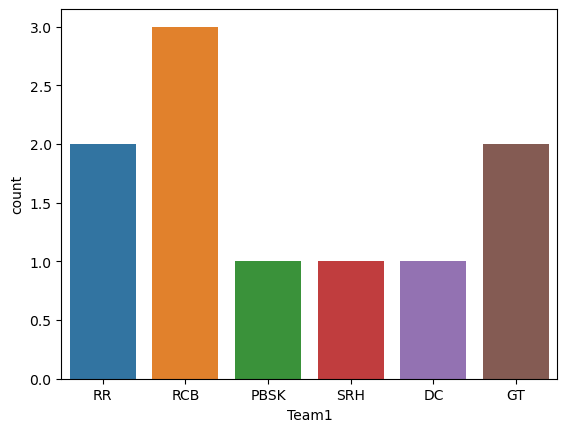

In [15]:
sns.countplot(x=player_stats.head(10).Team1)

In [18]:
player_stats.loc['Wanindu Hasaranga']

Overs              57.0
Maidens               1
Runs                430
Wickets              26
Economy          123.25
Dream11_score       760
Team1               RCB
Name: Wanindu Hasaranga, dtype: object

In [19]:
team_stats=player_stats.groupby('Team1').sum().sort_values('Wickets',ascending=False)
team_stats

,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
Team1,,,,,,
RR,331.6,6,2788,97,831.11,2939
LSG,293.7,5,2448,92,755.98,2768
GT,306.6,0,2506,90,770.63,2682
RCB,302.1,6,2570,90,808.95,2760
DC,277.5,1,2371,86,715.72,2540
MI,268.5,3,2304,82,713.01,2450
SRH,271.2,3,2384,81,723.53,2415
CSK,264.9,1,2211,78,712.64,2346
PBSK,260.1,1,2205,77,725.76,2313


In [20]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [21]:
categorical_features=bow[['PlayerName','Team1','Team2']]

In [23]:
for column in categorical_features:
    bow[column]=label_encoder.fit_transform(bow[column])
bow.head()

,PlayerName,Team1,Team2,Overs,Maidens,Runs,Wickets,Economy,Dream11_score
0,113,3,0,4.0,0,20,2,5.00,58
1,101,3,0,4.0,0,35,0,8.75,4
2,117,3,0,4.0,0,23,1,5.75,33
3,106,3,0,4.0,0,15,0,3.75,10
4,7,3,0,4.0,0,38,1,9.50,29


In [24]:
x=bow.drop('Dream11_score',axis=1)
x

,PlayerName,Team1,Team2,Overs,Maidens,Runs,Wickets,Economy
0,113,3,0,4.0,0,20,2,5.00
1,101,3,0,4.0,0,35,0,8.75
2,117,3,0,4.0,0,23,1,5.75
3,106,3,0,4.0,0,15,0,3.75
4,7,3,0,4.0,0,38,1,9.50
...,...,...,...,...,...,...,...,...
851,110,8,2,4.0,1,14,1,3.50
852,79,8,2,4.0,0,40,1,10.00
853,124,8,2,4.0,0,20,1,5.00
854,74,8,2,3.1,0,26,0,8.21


In [25]:
y=bow['Dream11_score']
y

0      58
1       4
2      33
3      10
4      29
       ..
851    47
852    27
853    33
854     4
855     2
Name: Dream11_score, Length: 856, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
len(x_train),len(y_train)

(684, 684)

In [28]:
len(x_test),len(y_test)

(172, 172)